In [1]:
import sys
sys.path.append('..')

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

from drake import ConsensusClustering
from world_bank import countries, indices

%matplotlib inline

X = np.load("world_bank.npz")["X"]
print(f"# countries: {X.shape[0]}")
print(f"# features in dragon vector: {X.shape[1]}")

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# countries: 74
# features in dragon vector: 35


ConsensusClustering(n_clusters=8): 100%|██████████████████████████████████████████| 1000/1000 [00:01<00:00, 963.16it/s]


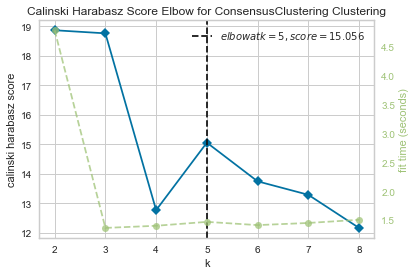

In [2]:
model = ConsensusClustering(n_jobs=-1, random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 9), metric="calinski_harabasz")
visualizer.fit(X)
visualizer.show()

In [3]:
best_k = visualizer.elbow_value_

model = ConsensusClustering(n_clusters=best_k, random_state=42)
labels = model.fit_predict(X)

ConsensusClustering(n_clusters=5): 100%|██████████████████████████████████████████| 1000/1000 [00:02<00:00, 388.22it/s]


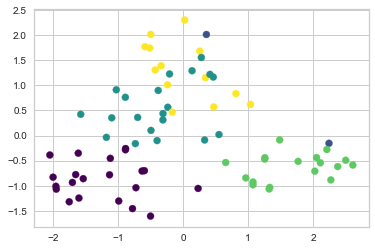

In [4]:
centered_X = X - X.mean(axis=0, keepdims=True)

pca = PCA(n_components=2, random_state=42)
reduced_X = pca.fit_transform(centered_X)

plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=labels, cmap="viridis")
plt.show()

In [5]:
from pickle import dump  

clustered_countries = {}

for i in np.unique(labels):
    clustered_countries[i] = np.array(countries)[labels == i]
    
dump(clustered_countries, open("clustered_countries.pkl", "wb"))